In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
! kaggle datasets download bayuokta/wayang-bagong-cepot-gareng-petruk-semar

 87% 39.0M/44.9M [00:03<00:00, 13.7MB/s]
100% 44.9M/44.9M [00:03<00:00, 15.2MB/s]


In [3]:
! unzip -qq wayang-bagong-cepot-gareng-petruk-semar.zip

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

In [5]:
data_dir = "images"
train_dir= "images/train/"
val_dir = "images/val/"
test_dir = "images/test/"

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   rotation_range=10)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (300, 300),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(val_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical')

Found 1350 images belonging to 5 classes.
Found 150 images belonging to 5 classes.


In [7]:
model = Sequential()


model.add(Conv2D(16, (3, 3), activation="relu", input_shape=(300, 300, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(16, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(activation = 'relu', units = 256))
model.add(Dense(activation = 'relu', units = 128))
model.add(Dense(activation = 'softmax', units = 5))

# Compile the Neural network
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 32)       0

In [9]:
history = model.fit(training_set,
                     epochs = 30,
                     validation_data = validation_generator)

Epoch 1/30
43/43 [==============================] - 38s 623ms/step - loss: 1.2790 - accuracy: 0.4415 - val_loss: 1.5445 - val_accuracy: 0.3067
Epoch 2/30
43/43 [==============================] - 29s 665ms/step - loss: 0.9450 - accuracy: 0.6030 - val_loss: 2.0104 - val_accuracy: 0.2000
Epoch 3/30
43/43 [==============================] - 27s 625ms/step - loss: 0.8754 - accuracy: 0.6356 - val_loss: 1.3699 - val_accuracy: 0.4133
Epoch 4/30
43/43 [==============================] - 26s 623ms/step - loss: 0.7733 - accuracy: 0.7059 - val_loss: 1.5456 - val_accuracy: 0.2933
Epoch 5/30
43/43 [==============================] - 26s 610ms/step - loss: 0.6460 - accuracy: 0.7385 - val_loss: 0.9607 - val_accuracy: 0.6267
Epoch 6/30
43/43 [==============================] - 26s 609ms/step - loss: 0.5437 - accuracy: 0.7859 - val_loss: 1.7174 - val_accuracy: 0.3200
Epoch 7/30
43/43 [==============================] - 26s 608ms/step - loss: 0.5906 - accuracy: 0.7733 - val_loss: 0.6910 - val_accuracy: 0.6867

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


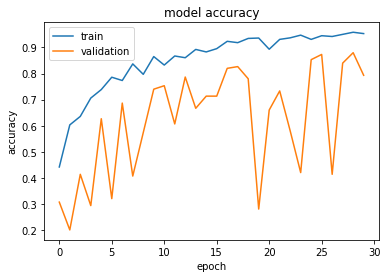

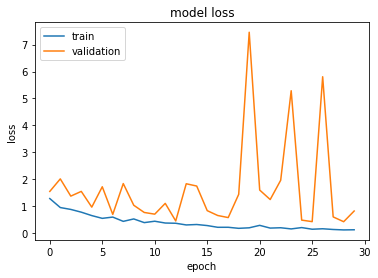

In [10]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model_h5
model.save('saved_model_h5/Baseline Model.h5')

In [14]:
from keras.models import load_model
import cv2
import numpy as np
from keras.preprocessing import image
from google.colab.patches import cv2_imshow
from PIL import Image

classes = ['bagong', 'cepot', 'gareng', 'petruk', 'semar']

loaded_model = load_model('Baseline Model.h5')

image_testing = Image.open('/content/images/test/wayang_petruk_261.jpg')
image_testing = np.array(image_testing.resize((300, 300))) / 255.0
image_testing.shape

image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

output = model.predict(image_testing)
best_index = np.argmax(output)
class_name = classes[best_index]

print(output)
print(best_index)

(1, 300, 300, 3)
[[5.461057e-03 8.946341e-03 7.332058e-04 9.847670e-01 9.228163e-05]]
3
